#Implementing logistic regression on MNIST dataset

###this code imports mnist data set and divide them into train and test samples  

In [1]:
from keras.datasets import mnist
from matplotlib import pyplot

(train_X, train_y), (test_X, test_y) = mnist.load_data()
type(train_y)
#print(train_X[0])

11501568/11490434 [==============================] - 0s 0us/step


numpy.ndarray

###function to Make a prediction with coefficients

In [2]:
import numpy as np 
def predict (row, coefficients):
    yhat = float(coefficients[0])
    for i in range(len(row)-1):
        yhat += coefficients[i+1] * row[i]
    #print('yhat = ' + str(yhat))
    return float(1.0 / (1.0 + np.exp(-yhat)))

###Estimate logistic regression coefficients using stochastic gradient descent

In [3]:
def coefficients_sgd (train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        for row in train: 
            yhat2 = predict(row, coef)
            error = float(row[-1] - yhat2)
            #print ('error is = ' + str(error))
            coef[0] = coef[0] + l_rate * error * yhat2 * (1.0 - yhat2)
            for i in range (len(row)-1):
                coef[i + 1] = coef[i + 1] + l_rate * error *  row[i] 
    #print ('coefficients are = ', coef)  
    return coef 

### function to Calculate accuracy percentage

In [4]:
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

###function for Linear Regression Algorithm With Stochastic Gradient Descent

In [5]:
def logistic_regression(train, test, l_rate, n_epoch):
    prediction = []
    coef = coefficients_sgd(train, l_rate, n_epoch)
    for row in test: 
        yhat1 = predict(row, coef)
        #print('result = '+ str(yhat1))
        if(yhat1 > 0.4): 
            yhat1 = 1
        else: 
            yhat1 =0 
        prediction.append(yhat1)
    return (prediction)

### functions to create matrix for train and test data sets with respect to perticular number we want to predict 

In [6]:
import numpy
def get_matrix (value, train_x, train_yy):
    train_yyy = numpy.empty(shape=(1,len(train_yy)), dtype = int) 
    for x in range(len(train_yy)):
        if train_yy[x] == value: 
            train_yyy[0][x] =1
        else: 
            train_yyy[0][x] =0
    #print (train_yyy)
    train_yyy=train_yyy.reshape(-1,1)
    #print (train_yyy)
    train_matrix = [ train_x[0].flatten()]
    for x in range(1,len(train_x)):
        A = train_x[x].flatten()
        #print(A)
        train_matrix = numpy.vstack([train_matrix, A])
    #print(train_matrix)
    train_matrix = numpy.hstack((train_matrix,train_yyy))
    return train_matrix

#matrix = get_matrix(8, train_X[:56], train_y[:56])

#print(matrix) 




In [7]:
def get_list (test_m):
    list = []
    for x in range(len(test_m)):
        list.append(test_m[x][784]) 
    return list 

###main 

In [8]:
import numpy as np

def main():
    value = 9
    train_matrix = get_matrix(value, train_X[:64], train_y[:64])
    validation_matrix = get_matrix(value, train_X[640:800], train_y[640:800])
    test_matrix = get_matrix(value, test_X[:20], test_y[:20])
    predicted =logistic_regression(train_matrix, test_matrix, 0.1, 100)
    accuracy = accuracy_metric(get_list(test_matrix), predicted)
    print('accuracy = ' + str(accuracy))
    print (test_y[:20])
    print(get_list(test_matrix))
    
    print(predicted)


main()




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


coefficients are =  [-0.0125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -14.5, -25.5, -21.1, -3.1, 0.0, -3.8000000000000003, -19.0, -2.5, 0.0, 0.0, -18.900000000000002, -19.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.3, -2.5, -1.0, 0.0, 0.0, 0.0, 0.0, 10.0, 38.60000000000001, 27.15, 8.2, -40.900000000000006, -34.8, -19.3, -28.0, -58.25000000000001, -41.00000000000001, -42.60000000000001, -49.95, -40.25000000000001, -21.65

###fuction to generate plot for accuracy with respect to number of epoch 

coefficients are =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


coefficients are =  [-0.0125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.6, 22.200000000000003, 5.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.2, -5.600000000000001, -5.500000000000002, -9.8, -14.499999999999998, -5.399999999999999, 12.799999999999999, 13.100000000000001, 25.400000000000002, 22.400000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.9, -15.200000000000001, -38.900000000000006, -9.649999999999999, -2.099999999999998

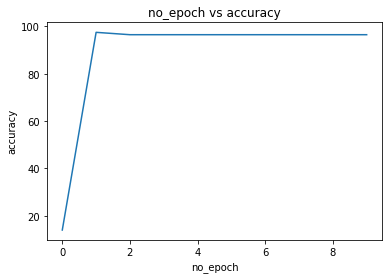

In [36]:
import matplotlib.pyplot as plt
train_matrix = get_matrix(1, train_X[:60], train_y[:60])
test_matrix = get_matrix(1, test_X[:200], test_y[:200])
def accuracyfunction(train_m, test_m, no_epoch, l_rate):
    accuracy_train = []
    for x in range(no_epoch):
        predicted_train =logistic_regression(train_m, test_m, l_rate, x)
        accuracy = accuracy_metric(get_list(test_m), predicted_train)
        accuracy_train.append(accuracy)
        #print(get_list(test_m))
        #print(predicted_train)
    print(accuracy_train)
    plt.plot(range(no_epoch), accuracy_train)
    plt.xlabel('no_epoch') 
    plt.ylabel('accuracy')  
    plt.title('no_epoch vs accuracy') 
accuracyfunction(train_matrix, test_matrix, 10, 0.1)

###fuction to generate plot for lossfunction with respect to number of epoch 

coefficients are =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


coefficients are =  [-0.0125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.5, -18.8, -4.800000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.600000000000001, 9.900000000000002, -10.500000000000004, -26.2, -20.6, -2.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.5, 24.2, 5.9, -6.4, -6.299999999999999, 3.1000000000000014, -1.7000000000000028, 3.799999999999997, -7.0, -21.999999999999996, 20.1, -18.3, -15.800000000000004, -32.1, -22.0, -1.9000000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.200000000000001, 19.500000000000004, -1.5, -14.70000

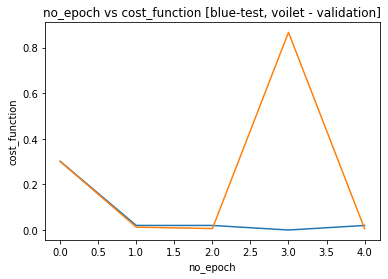

In [33]:

import math
import matplotlib.pyplot as plt
train_matrix = get_matrix(1, train_X[:640], train_y[:640])
test_matrix = get_matrix(1, train_X[600:650], train_y[600:650])
validation_matrix = get_matrix(1, train_X[640:800], train_y[640:800])


def get_htheta(train, test, n_epoch, l_rate):
    prediction = []
    coef = coefficients_sgd(train, l_rate, n_epoch)
    for row in test: 
        yhat1 = predict(row, coef)
        prediction.append(yhat1)
    return (prediction)

def get_cost(actual, predicted):
    cost = 0
    for i in range(len(actual)):
        if predicted[i] == 1:
            if predicted[i] == actual[i]: 
                cost +=  0
            else: 
                cost += 1
        elif predicted[i] ==0:  
            if predicted[i] == actual[i]: 
                cost +=  0
            else: 
                cost += 1
        else : 
            cost += -(actual[i] * math.log(predicted[i],10)) - ((1-actual[i]) * math.log(1-predicted[i], 10))
    return cost/len(actual)



def costfunction(train_m,validation_m, no_epoch, l_rate):
    cost_values = []
    for x in range(no_epoch):
        predicted_validation =get_htheta(train_m, validation_m, x, l_rate)
        cost = get_cost(get_list(validation_m), predicted_validation)
        cost_values.append(cost)
        #print(get_list(validation_m))
        #print(predicted_validation)
    print(cost_values)
    plt.plot(range(no_epoch), cost_values)
    plt.xlabel('no_epoch') 
    plt.ylabel('cost_function')  
    plt.title('no_epoch vs cost_function [blue-test, voilet - validation]') 


costfunction(train_matrix, test_matrix, 5, 0.1)

costfunction(train_matrix, validation_matrix, 5, 0.1)
    



Implimenting Logistic Regression with reguralized loss lossfunction 

###function to update coefficients using Regularized loss function 

In [13]:
def coefficients_sgd_2 (train, l_rate, n_epoch, lambdaa):
    coef = [0.0 for i in range(len(train[0]))]
    #print('heei print enpoch =', + n_epoch  )
    #print(type(n_epoch))

    for epoch in range(int(n_epoch)):
        for row in train: 
            yhat2 = predict(row, coef)
            error = float(row[-1] - yhat2)
            #print ('error is = ' + str(error))
            coef[0] = coef[0] + l_rate * error * yhat2 * (1.0 - yhat2)
            for i in range (len(row)-1):
                coef[i + 1] = coef[i + 1] + l_rate * error *  row[i] 
        for i in range(len(coef)):
            coef[i] = coef[i] + lambdaa *  coef[i] 
    return coef 

###fuction to generate plot for accuracy with respect to number of epoch 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


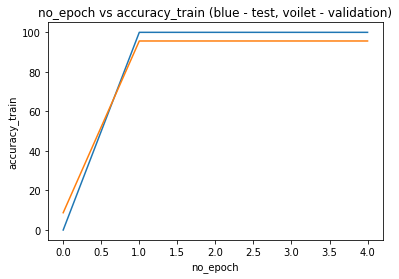

In [34]:

def logistic_regression_2(train, test, l_rate, n_epoch, lambdaa):
    prediction = []
    coef = coefficients_sgd_2(train, l_rate, n_epoch, lambdaa)
    for row in test: 
        yhat1 = predict(row, coef)
        #print('result = '+ str(yhat1))
        if(yhat1 > 0.4): 
            yhat1 = 1
        else: 
            yhat1 =0 
        prediction.append(yhat1)
    return (prediction)


import matplotlib.pyplot as plt
train_matrix = get_matrix(1, train_X[:6], train_y[:6])
test_matrix = get_matrix(1, test_X[:2], test_y[:2])
def accuracyfunction_2(train_m, test_m, no_epoch, lambdaa):
    accuracy_train = []
    for x in range(no_epoch):
        predicted_train =logistic_regression_2(train_m, test_m, 0.1, x, lambdaa)
        accuracy = accuracy_metric(get_list(test_m), predicted_train)
        accuracy_train.append(accuracy)
        #print(get_list(test_m))
        #print(predicted_train)
    #print(accuracy_train)
    plt.plot(range(no_epoch), accuracy_train)
    plt.xlabel('no_epoch') 
    plt.ylabel('accuracy_train')  
    plt.title('no_epoch vs accuracy_train (blue - test, voilet - validation)') 

accuracyfunction_2(train_matrix, test_matrix,5, 0.1 )
accuracyfunction_2(train_matrix, validation_matrix, 5, 0.1)

### fuction to generate plot for loss function with respect to number of epoch 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


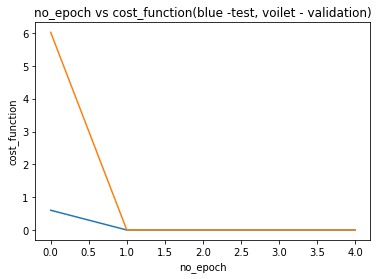

In [35]:
import math
import matplotlib.pyplot as plt
train_matrix = get_matrix(1, train_X[:60], train_y[:60])
validation_matrix = get_matrix(1, train_X[60:80], train_y[60:80])




def get_htheta_2(train, test, n_epoch, l_rate, lambdaa):
    prediction = []
    coef = coefficients_sgd_2(train, l_rate, n_epoch, lambdaa)
    for row in test: 
        yhat1 = predict(row, coef)
        prediction.append(yhat1)
    return coef, prediction

def get_cost_2(actual, predicted, coef, lambdaa):
    l2_val =0
    for i in range(len(coef)): 
        l2_val = abs(coef[i]* coef[i])
    l2_val = l2_val * lambdaa * 0.5 

    cost = 0
    for i in range(len(actual)):
        if predicted[i] == 1:
            if predicted[i] == actual[i]: 
                cost += 0
            else: 
                cost += 1
        elif predicted[i] ==0:  
            if predicted[i] == actual[i]: 
                cost +=  0
            else: 
                cost += 1
        else: 
            cost += -(actual[i] * math.log(predicted[i],10)) - ((1-actual[i]) * math.log(1-(predicted[i]), 10))
    return cost + l2_val



def costfunction_2(train_m,validation_m, no_epoch, l_rate, lambdaa):
    cost_values = []
    for x in range(no_epoch):
        coef, predicted_validation =get_htheta_2(train_m, validation_m, x, l_rate, lambdaa)
        cost = get_cost_2(get_list(validation_m), predicted_validation, coef, lambdaa)
        cost_values.append(cost)
        #print(get_list(validation_m))
        #print(predicted_validation)
    #print(cost_values)
    plt.plot(range(no_epoch), cost_values)
    plt.xlabel('no_epoch') 
    plt.ylabel('cost_function')  
    plt.title('no_epoch vs cost_function(blue -test, voilet - validation)') 

def costfunction_plot(train_m,validation_m, no_epoch, l_rate, lambdaa):
       coef, predicted_validation =get_htheta_2(train_m, validation_m, no_epoch, l_rate, lambdaa)
       cost = get_cost_2(get_list(validation_m), predicted_validation, coef, lambdaa)
       return cost 



costfunction_2(train_matrix, test_matrix, 5, 0.1, 0.1)
costfunction_2(train_matrix, validation_matrix, 5, 0.1, 0.1)


# graph of cost function with different value of λ = 0, 0.001, 0.01, 0.1, 1.0 with respect to number of epochs.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


[[6.02059991 6.02059991 6.02059991 6.02059991 6.02059991 6.02059991
  6.02059991 6.02059991 6.02059991 6.02059991]
 [0.42063354 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.32532924 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.29106247 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.27252893 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]]


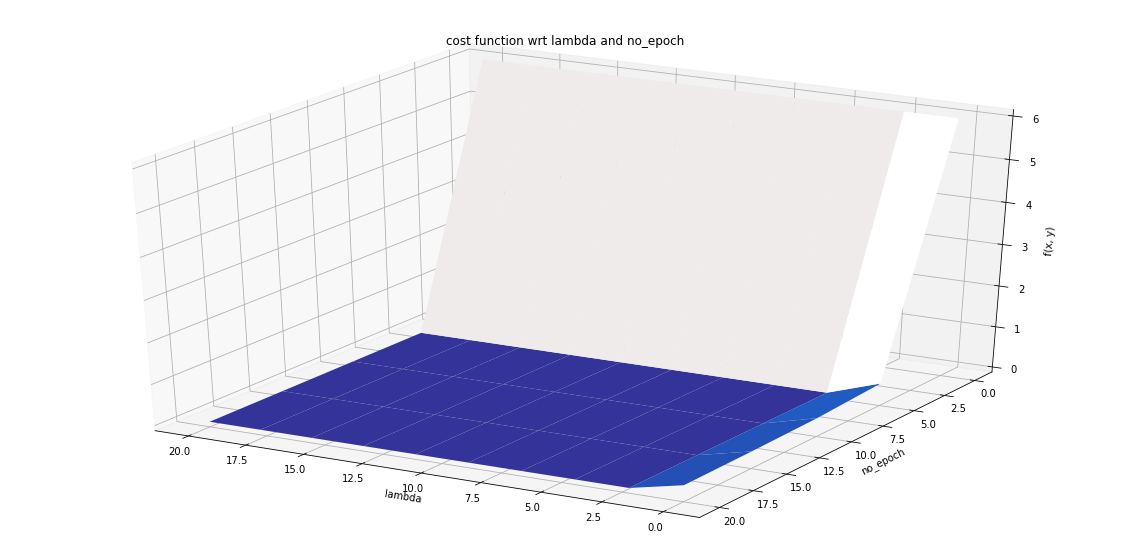

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

train_matrix = get_matrix(1, train_X[:60], train_y[:60])
test_matrix = get_matrix(1, train_X[600:620], train_y[600:620])
validation_matrix = get_matrix(1, train_X[640:660], train_y[640:660])

def plot_surface(domain, fn, grid_samples=5, title=None, **plot_kwargs):
    x = np.linspace(domain[0][0], domain[0][1], 2*grid_samples)
    y = np.linspace(domain[1][0], domain[1][1], grid_samples)
    
    X, Y = np.meshgrid(x, y)
    fn_vectorized = np.vectorize(fn)
    Z = fn_vectorized(X, Y)
    print(Z)
    fig = plt.figure(figsize=(20,10))
    ax = plt.axes(projection="3d")
    ax.view_init(30,120)
    ax.plot_surface(X, Y, Z, **plot_kwargs)
    ax.set(xlabel="lambda", ylabel="no_epoch", zlabel="f(x, y)", title  = "cost function wrt lambda and no_epoch")
    plt.close()
    return fig, ax



def func(x, y):
    return costfunction_plot(train_matrix,test_matrix, y, 0.000001, x)
    
domain = [(0,20), (0,20)] 
fig, ax = plot_surface(domain, func, rstride=1, cstride=1, cmap='terrain', edgecolor=None)

fig


# graph of cost function with different value of λ = 0, 0.001, 0.01, 0.1, 1.0 with respect to Learning Rate .

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


[[6.02059991 1.7837432  1.98357236 2.13542141 2.20388405 1.96148501
  1.67466665 1.47327134 1.40811773 1.43588177]
 [6.02059991 2.         2.         2.         2.         3.
  3.         3.         3.         3.        ]
 [6.02059991 2.         2.         2.         3.         3.
  3.         3.         3.         3.        ]
 [6.02059991 2.         2.         2.         3.         3.
  3.         3.         3.         3.        ]
 [6.02059991 2.         2.         2.         3.         3.
  3.         3.         3.         3.        ]]


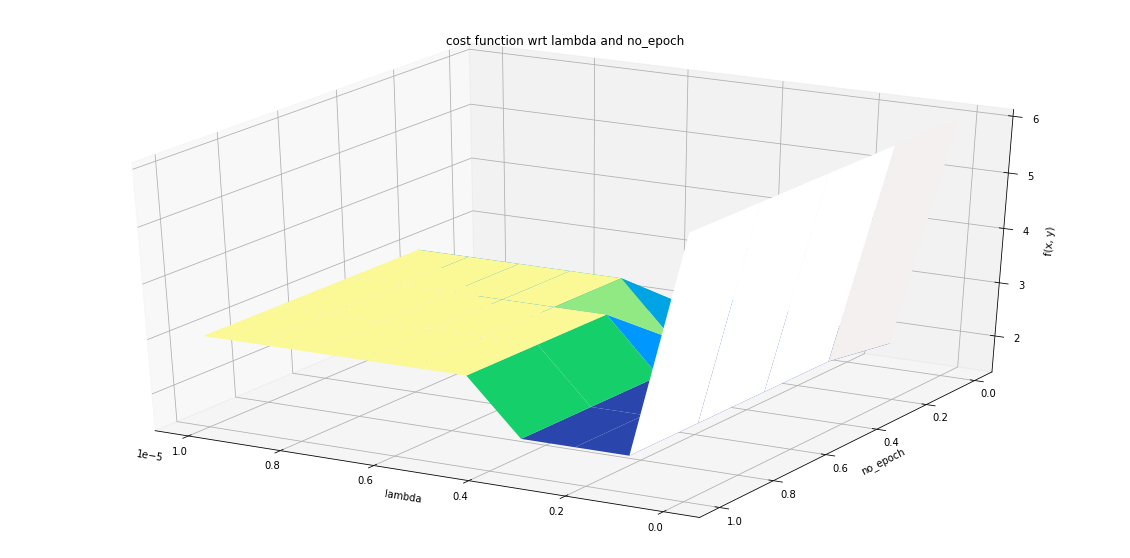

In [22]:
train_matrix = get_matrix(1, train_X[:60], train_y[:60])
validation_matrix = get_matrix(1, train_X[640:660], train_y[640:660])

def func(x, y):
    return costfunction_plot(train_matrix,validation_matrix, 25 ,x , y)
    
domain = [(0,0.00001), (0,1)] 
fig, ax = plot_surface(domain, func, rstride=1, cstride=1, cmap='terrain', edgecolor=None)

fig